# MA3001B
## 5.5 Time series analysis

In [ ]:
pip install pytsdatasets

  Using cached pytsdatasets-1.0-py3-none-any.whl.metadata (4.2 kB)
  Using cached pandas-1.1.2.tar.gz (5.2 MB)
  Installing build dependencies ... canceled
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "

In [ ]:
import pandas as pd
pd.__version__

'1.4.4'

https://github.com/mjuez/pytsdatasets

@software{pytsdatasets,
  author       = {Mario Juez-Gil},
  title        = {{mjuez/pytsdatasets}},
  month        = oct,
  year         = 2020,
  publisher    = {Zenodo},
  version      = {v1.0},
  doi          = {10.5281/zenodo.4063496},
  url          = {https://doi.org/10.5281/zenodo.4063496}
}

In [ ]:
#import pytsdatasets as tsds
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def test_stationarity(timeseries):

    #Determining rolling statistics
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    #plotting rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    st = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling  Mean & Standard Deviation')
    plt.show()

    #Dickey_Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

    #kpss test:
    print('Results of kpss Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

## Time series and stochastic processes

We define a random variable as a function (or a map):

$X:S\rightarrow\mathbb{R}$

from $S$ (the experiment sample space) to a real number. If we repeat the experiment many times we obtain different values of $X$, for example: $x=(5,15,19,..)$. We say that $5$, fo example, is a "realization" of $X$ (the result obtained $\bf{after}$ the experiment).

Let's consider now a sequence of random variables, considered at different times equally spaced:

$X_{t=1},X_{t=2},X_{t=3},..$

The sequence is called a "stochastic process". At each time, each random variable can have its own distribution with its expectation and variance:

$X_t\sim distribution(\mu_t,\sigma_t^2)$

We define a time series as the realization of a stochastic process. So we consider the correspondance between the stochastic process $X=(X_{t_1},X_{t_2},...,X_{T})$ and its realization (the time series) $x=(x_{t=1},x_{t=2},...,x_{T})$. At each time, the value of the time series $x_{t}$ is a realization of the random variable $X_t$. The advantage of identifying the series as a realization of a stochastic process is that we can use statistical properties of the random variables, as mean, variance, covariance, to describe the time series.

### Example: Johnson & Johnson dataset
Quarterly earnings per share, 84 quarters (21 years) measured from the first quarter of 1960 to the last quarter of 1980.

In [ ]:
data=pd.read_csv('/content/Johnson&Johnson.csv')
#data = tsds.jj
#data.head()
#data['time'] = pd.to_datetime(data['time']).dt
#data.reset_index(inplace=True)
#data['date'] = data['date'].astype('str')
data.set_index(data['time'])
#data.drop('date',axis=1,inplace=True)
data.head()

,time,value
0,1960.00,0.71
1,1960.25,0.63
2,1960.50,0.85
3,1960.75,0.44
4,1961.00,0.61


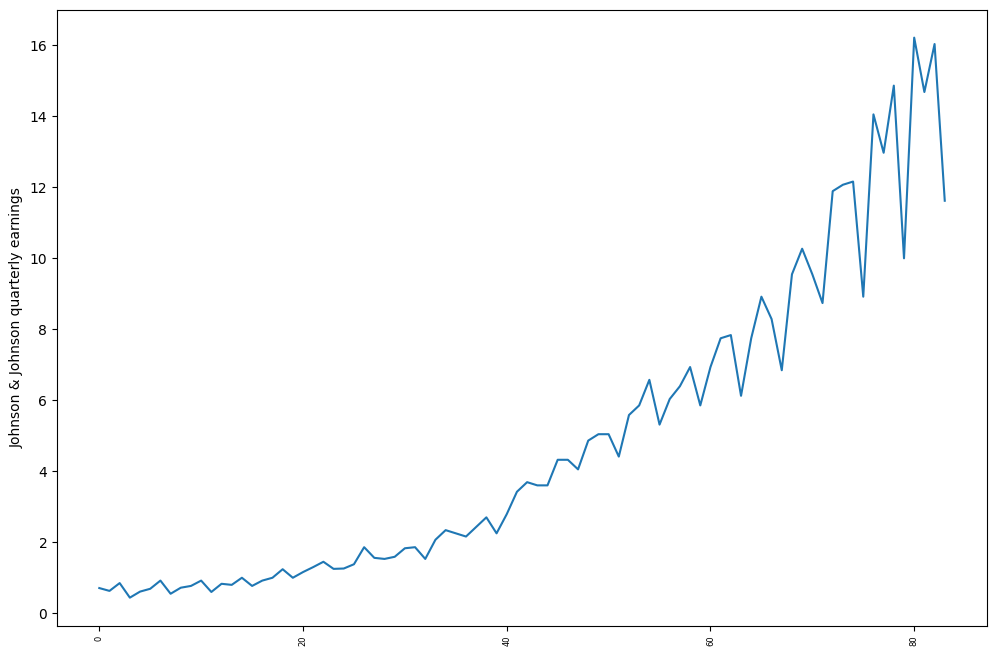

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(data['value'])
plt.xticks(rotation = 90,size=6)
plt.ylabel('Johnson & Johnson quarterly earnings')
plt.show()

In this plot we can notice a positive trend (the earnings increase during time) but also we can notice some periodic fluctuations due to a seasonality. We can also notice that the increase in earnings is not constant during time and that the dispersion around the mean value is not constant.

## 5.5.1 Stationarity

A time series is said stationary if there is no a systematic change in the mean, i.e. there is no a trend, there is no a systematic change in the variation. In a stationary time series, the properties of the series on a section of data are very similar to the properties of the time series on another section. To be more precise, stationarity is a property of a stochastic process and since we model time series with stochastic process, we also define stationarity for time series. There are several definitions of stationarity, but we will stick to the "second order stationarity":

Given a time series $x_t$, we say that the time series is stationary if:

* $E[x_t] = \mu_t\,\,\,(constant)$
* $Var(x_t)=V_{0}\,\,\,(constant)$
* $Cov(x_t,x_{t+k})=V_k$ (only depends on the time difference k)

When a time series isn't stationary, it is possile to apply transformations to make it stationary, by removing the trend or differencing.

## Stationarity tests

The easiest way to check for stationarity is plotting the time series and visually check whether the series has trend and seasonality.
Sometimes, even though a trend or seasonality is not evident, the time series has non-stationary components that can be detected with a statistical test.

### Dickey-Fuller test

The test is based on the hypothesis test:

* Null Hypothesis (HO): Series is non-stationary

* Alternate Hypothesis(HA): Series is stationary

If the test statistic is lower than the critical Value and p-value < 0.05 – Reject Null Hypothesis(HO) i.e., time series $\bf{is\,stationary}$.

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

The test is based on the hypothesis test:

* Null Hypothesis (HO): Series is stationary

* Alternate Hypothesis(HA): Series is non-stationary

It is a test for the stationarity of a given series around a deterministic trend.
If p-value is less than the significance level (say 0.05), **the series is non-stationary**.

### ¿Which test is better?

The suggested strategy is to apply both tests:

* Both tests conclude that the given series is stationary – The series is stationary
* Both tests conclude that the given series is non-stationary – The series is non-stationary
* DF concludes non-stationary and KPSS concludes stationary – The series is trend stationary. To make the series strictly stationary, the trend needs to be removed in this case. Then the detrended series is checked for stationarity.

* DF concludes stationary and KPSS concludes non-stationary – The series is difference stationary. Differencing is to be used to make series stationary. Then the differenced series is checked for stationarity.

https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/#:~:text=A%20Stationary%20series%20is%20one,a%20Trend%20or%20Seasonal%20components.

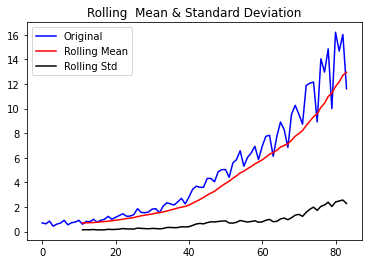

Results of Dickey-Fuller Test:
Test Statistic                  2.742017
p-value                         1.000000
#Lags Used                     11.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64
Results of kpss Test:
Test Statistic            0.706778
p-value                   0.012929
#Lags Used               12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


In [ ]:
test_stationarity(data.iloc[:,0])

### Global Temperature Dataset
Global mean land-ocean temperature deviations (from 1951-1980 average), measured in degrees centigrade, for the years 1880-2015. This was an update of gtemp, but gtemp_land and gtemp_ocean are the most recent updates.

In [ ]:
data1 = tsds.globaltemp
data1.reset_index(inplace=True)
data1.set_index(data1['year'])
#data1['year']=data1['year'].astype('str')
data1.drop('year',axis=1,inplace=True)

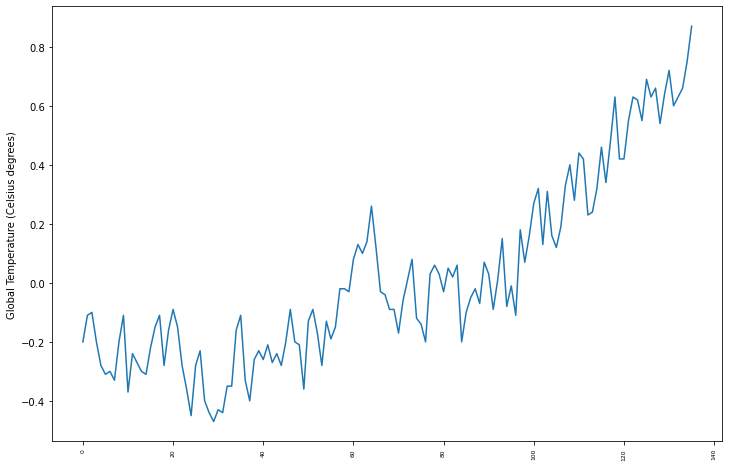

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(data1)
plt.xticks(rotation = 90,size=6)
plt.ylabel('Global Temperature (Celsius degrees)')
plt.show()

We can observe fluctuations due to a seasonality and an increase with time.

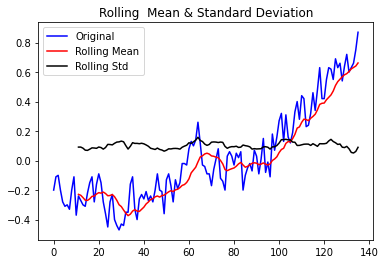

Results of Dickey-Fuller Test:
Test Statistic                   0.620215
p-value                          0.988103
#Lags Used                       3.000000
Number of Observations Used    132.000000
Critical Value (1%)             -3.480888
Critical Value (5%)             -2.883697
Critical Value (10%)            -2.578586
dtype: float64
Results of kpss Test:
Test Statistic            0.929483
p-value                   0.010000
#Lags Used               13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [ ]:
test_stationarity(data1.iloc[:,0])

### Air Passengers datasets
The classic Box & Jenkins airline data. Monthly totals of international airline passengers, 1949 to 1960.

In [ ]:
data2 = tsds.airpassengers
data2.reset_index(inplace=True)
#data2['date']=data2['date'].astype('str')


In [ ]:
data2.set_index(data2['date'])
data2.drop('date',axis=1,inplace=True)

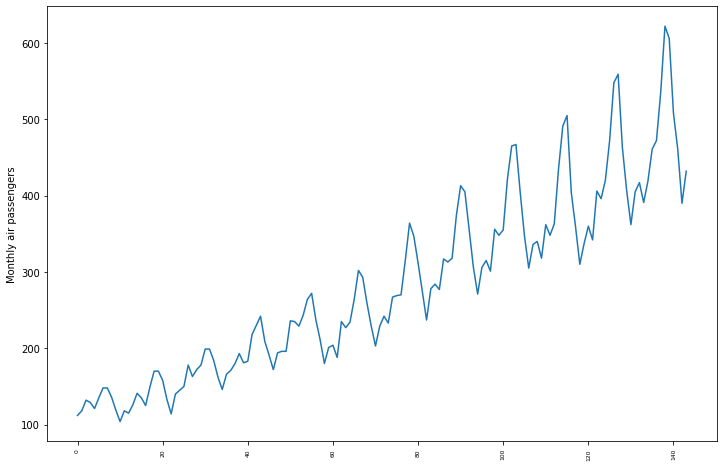

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(data2)
plt.xticks(rotation = 90,size=6)
plt.ylabel('Monthly air passengers')
plt.show()

We can notice a global trend (number of air passengers increases with time), we can notice a seasonality but it is not clear whether the variance is constant or not.

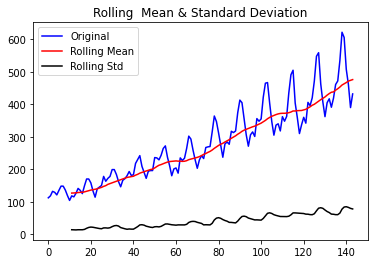

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Results of kpss Test:
Test Statistic            1.052175
p-value                   0.010000
#Lags Used               14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [ ]:
test_stationarity(data2.iloc[:,0])


We can see that the mean value increases with time, but the standard deviation (black curve) is almost constant.

## Removing trend

Let's consider the "Air passenger" time series, where there is an evident positive trend, i.e. the mean increases with time. We can initially use transformations to smooth higher values, as logarithmic transformation:

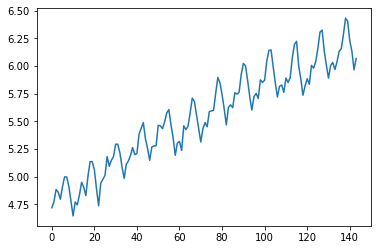

In [ ]:
tslog = np.log(data2['data'])
plt.plot(tslog)

Then we can calculate rolling averages, i.e. take the average of ‘k’ consecutive values (depending on the frequency of time series). In this example we consider the average of 12 months:

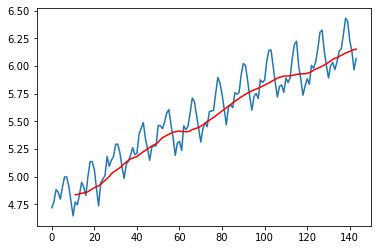

In [ ]:
rollavg = tslog.rolling(12).mean()
plt.plot(tslog)
plt.plot(rollavg, color = 'red')

We remove the trend from the original time series subtracting the rolling mean to the time series:

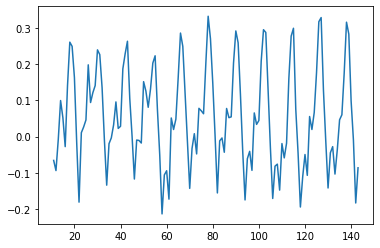

In [ ]:
tslogdiff = tslog - rollavg
tslogdiff.dropna(inplace = True)
plt.plot(tslogdiff)

The trend has been removed, but the series isn't stationary because of seasonality. To make it stationary other transformations would be necessary.

## Example: Random walk

The simplest stochastic process is the "random walk", described by the model:

$X_t=X_{t-1}+Z_t$

The random variable $X_t$ at time $t$ is equal to the random variable at previous time $t-1$ plus a residual $Z_t$ which is pure white noise:

$Z_t\sim Normal(\mu,\sigma^2)$

i.e. a random variable with normal distribution with parameters $(\mu,\sigma^2)$.
If we consider:

* $X_0=0$
* $X_1=X_0+Z_1=Z_1$
* $X_2=X_1+Z_2=Z_1+Z_2$
* $X_3=X_2+Z_3=Z_1+Z_2+Z_3$
* ...
* $X_t=\sum_{i=1}^t Z_i$

For the linearity of expectation, we have:

$E[X_t]=E\big[\sum_{i=1}^t Z_i\big]=\sum_{i=1}^t E[Z_i]=\mu t$

$Var(X_t)=Var\big(\sum_{i=1}^t Z_i\big)=\sum_{i=1}^t Var(Z_i)=\sigma^2t$

We simulate a random walk with $X_1=0$ and $Z_t\sim Normal(0,1)$:

<ipython-input-11-9ba06b119aef>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i]=x[i-1]+z


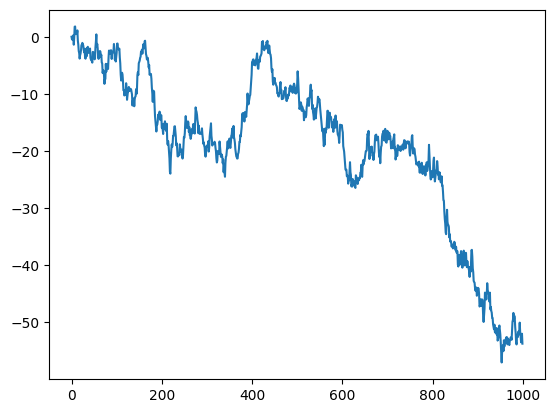

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x = np.zeros(1000)

for i in range(1,1000):
    z = np.random.normal(0,1,1)
    x[i]=x[i-1]+z

rw = pd.DataFrame()
rw['serie']=x
plt.plot(rw)

### Differencing

We can see that there is high autocorrelation and there is no stationarity. To remove the trend we can create a new time series using the so called "difference operator", which calculates the difference:

$X_t-X_{t-1}$

at any time t. Given the random walk

$\nabla X_{t}=X_t-X_{t-1}$

Applying it to the random walk process:

$X_t=X_{t-1}+Z_t$

$\nabla X_t=X_t-X_{t-1}=Z_t$

and the result is the purely random process $Z_t$, and it is stationary.

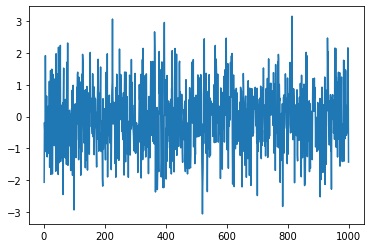

In [ ]:
from statsmodels.tsa.statespace.tools import diff
rwdiff = diff(rw['serie'])
plt.plot(rwdiff)

Again, as shown in the example of previous section, we can see that applying the difference operator we can make the series stationary.